In [1]:
import numpy as np
from sklearn import datasets
import pandas as pd
import math
from sklearn import preprocessing
from sklearn import model_selection
import matplotlib.pyplot as plt

In [2]:
data = datasets.load_breast_cancer()
x_data = data.data
y_data = data.target
x_train, x_test, y_train, y_test= model_selection.train_test_split(x_data,y_data)
x_train.shape,y_train.shape

((426, 30), (426,))

In [16]:
def cost(x, y ,m):
    M = len(x)
    cost = 0 
    for i in range(M):
        cost+=np.log(1+np.exp(sum(m*x[i])))-(y[i]*sum(m*x[i]))
    #tot_cost = ((1/(M))*(np.log(1+np.exp((m*x).sum()))-y*((m*x).sum(axis = 1).shape))).sum()
    return cost
    

In [17]:
def step_gradient(x , y ,lr, m):
    m_slope= np.zeros(shape = x.shape[1]) 
    M = len(x)
    features = x.shape[1]
    
    for i in range(M):
        X = x[i] 
        Y = y[i]
        
        for j in range(features):
            m_slope[j] += (-1/M)*((Y-(1/(1+np.exp(-1*(X*m).sum())))).sum())*X[j]
        
    new_m = m - (lr*m_slope)
    return new_m
        

In [18]:
def gd(x,y ,lr,num):
    m = np.zeros(len(x[0]))
    
    for i in range(num):
        m = step_gradient(x,y,lr,m)
        print(i,"  Cost:",cost(x,y,m))
        plt.scatter(i,cost(x,y,m))
    plt.show()
        
    return m 

In [24]:
def run(x_train,y_train,x_test):
    
    
    scaler = preprocessing.StandardScaler()
    scaler.fit(x_train)
    x = scaler.transform(x_train)
    x = np.append(x, np.ones(len(x)).reshape(-1,1), axis = 1)
    
    
    
    lr = 0.1
    num = 100
    print(x_train.shape,y_train.shape)
    m = gd(x,y_train,lr,num)
    
    test1 = scaler.transform(x_test)
    x_test = np.append(test1,np.ones(len(test1)).reshape(-1,1), axis = 1)
    
    
    
    y_pred = []

    
    for i in x_test:
        if 1/(1+np.exp(-1*(m*i).sum()))<0.5:
            y_pred.append(0)
        else:
            y_pred.append(1)
    
    return y_pred


(426, 30) (426,)
0   Cost: 225.18549369249897
1   Cost: 188.98365530909794
2   Cost: 166.55923826713286
3   Cost: 150.9860028573047
4   Cost: 139.3721098770561
5   Cost: 130.28164425014245
6   Cost: 122.91341128382035
7   Cost: 116.78179526846024
8   Cost: 111.57361920138491
9   Cost: 107.07688581071555
10   Cost: 103.14237746010221
11   Cost: 99.66162962235042
12   Cost: 96.55364004579239
13   Cost: 93.75650511035995
14   Cost: 91.22196683977074
15   Cost: 88.911747993561
16   Cost: 86.79502315418726
17   Cost: 84.84663288931881
18   Cost: 83.04579655627667
19   Cost: 81.3751673658786
20   Cost: 79.82012714335954
21   Cost: 78.36825202055681
22   Cost: 77.00890203359367
23   Cost: 75.73290189036285
24   Cost: 74.53228974961024
25   Cost: 73.40011738610019
26   Cost: 72.33028964356706
27   Cost: 71.31743426036613
28   Cost: 70.35679542084095
29   Cost: 69.44414602148633
30   Cost: 68.57571483473215
31   Cost: 67.74812563363461
32   Cost: 66.95834599683299
33   Cost: 66.20364400678002
3

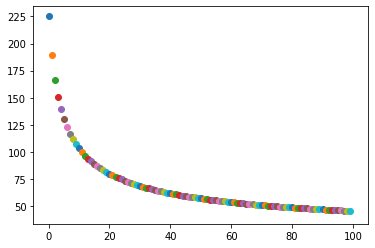

In [25]:
y_pred = run(x_train,y_train,x_test)